In [2]:
import pandas as pd

# Cargar el archivo CSV
nombre_archivo = "REC21_2023.csv"  # Asegúrate de proporcionar la ruta correcta
hoja = "REC21_2023"  # Nombre lógico para la "hoja"

# Importar los datos del CSV
df1 = pd.read_csv(nombre_archivo)

# Imprimir los datos con el nombre de la hoja
print(f"Datos de {hoja}:")
print(df1)

#######################
import pandas as pd

# Cargar el archivo CSV
nombre_archivo1 = "RE223132_2023.csv"  # Asegúrate de proporcionar la ruta correcta
hoja1 = "RE223132_2023"  # Nombre lógico para la "hoja"

# Importar los datos del CSV
df2 = pd.read_csv(nombre_archivo1)

# Imprimir los datos con el nombre de la hoja
print(f"Datos de {hoja1}:")
print(df2)


C:\Users\jaret\AppData\Local\Temp\ipykernel_56336\3797182642.py:8: DtypeWarning: Columns (15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(nombre_archivo)


Datos de REC21_2023:
        ID1              CASEID  BIDX  BORD  B0  B1    B2    B3  B4  B5  ...  \
0      2023        000100601  2     4     1   0   6  2001  1218   1   1  ...   
1      2023        000102201  2     1     1   0  11  2020  1451   2   1  ...   
2      2023        000102801  1     2     1   0  10  2015  1391   1   1  ...   
3      2023        000106501  2     1     1   0   6  2018  1423   2   1  ...   
4      2023        000108001  1     2     1   0   6  2012  1351   1   1  ...   
...     ...                 ...   ...   ...  ..  ..   ...   ...  ..  ..  ...   
63588  2023        542607001  2     1    13   0   3  2019  1431   1   1  ...   
63589  2023        362208901  2     3    14   0   4  2011  1336   2   0  ...   
63590  2023        532901101  2     1    14   0   4  2014  1372   1   1  ...   
63591  2023        362208901  2     2    15   0   6  2015  1386   1   1  ...   
63592  2023        362208901  2     1    16   0   4  2017  1408   1   1  ...   

       BCMC BEDAD 

In [4]:
print(df1)

        ID1              CASEID  BIDX  BORD  B0  B1    B2    B3  B4  B5  ...  \
0      2023        000100601  2     4     1   0   6  2001  1218   1   1  ...   
1      2023        000102201  2     1     1   0  11  2020  1451   2   1  ...   
2      2023        000102801  1     2     1   0  10  2015  1391   1   1  ...   
3      2023        000106501  2     1     1   0   6  2018  1423   2   1  ...   
4      2023        000108001  1     2     1   0   6  2012  1351   1   1  ...   
...     ...                 ...   ...   ...  ..  ..   ...   ...  ..  ..  ...   
63588  2023        542607001  2     1    13   0   3  2019  1431   1   1  ...   
63589  2023        362208901  2     3    14   0   4  2011  1336   2   0  ...   
63590  2023        532901101  2     1    14   0   4  2014  1372   1   1  ...   
63591  2023        362208901  2     2    15   0   6  2015  1386   1   1  ...   
63592  2023        362208901  2     1    16   0   4  2017  1408   1   1  ...   

       BCMC BEDAD QD333_1 QD333_2  QD33

In [10]:
df_filtrado1 = df1[['CASEID', 'B4']]

In [11]:
print(df_filtrado1 )

                   CASEID  B4
0            000100601  2   1
1            000102201  2   2
2            000102801  1   1
3            000106501  2   2
4            000108001  1   1
...                   ...  ..
63588        542607001  2   1
63589        362208901  2   2
63590        532901101  2   1
63591        362208901  2   1
63592        362208901  2   1

[63593 rows x 2 columns]


In [13]:
df_filtrado2 = df2[['CASEID', 'V206']]
print(df_filtrado2)

                   CASEID  V206
0            000100601  2     0
1            000100601  3     0
2            000101001  3     0
3            000102201  2     0
4            000102801  1     0
...                   ...   ...
35652        542901001  4     0
35653        542901501  1     0
35654        542901501  5     0
35655        542901701  1     0
35656        542901701  2     0

[35657 rows x 2 columns]


In [7]:
# tabla_Resultante_1 = pd.merge(df1,df2,on="ID1",how="inner")
# print(tabla_Resultante_1)

In [14]:
import dask.dataframe as dd

# Leer los DataFrames como Dask DataFrames
df1_dask = dd.from_pandas(df_filtrado1, npartitions=20)  # Puedes ajustar el número de particiones
df2_dask = dd.from_pandas(df_filtrado2, npartitions=20)

# Realizar el merge
tabla_Resultante_1 = dd.merge(df1_dask, df2_dask, on="CASEID", how="inner")

# Computar el resultado
tabla_Resultante_1 = tabla_Resultante_1.compute()

# Imprimir el resultado
print(tabla_Resultante_1)


                  CASEID  B4  V206
0           335507601  1   1     0
1           336205101  2   1     0
2           336703401  2   1     0
3           336904701  2   2     0
4           337200601  2   1     0
...                  ...  ..   ...
3016        538710901  2   2     0
3017        538910601  2   1     0
3018        539311301  2   2     0
3019        539507001  2   1     0
3020        540704001  2   1     0

[63593 rows x 3 columns]


In [15]:
# Exportar datos y luego aplicar formato
tabla_Resultante_1.to_excel('tabla_r.xlsx', sheet_name='Hoja1', index=False)


In [16]:
df_renombrado = tabla_Resultante_1.rename(columns={'B4': 'SEXO', 'V206': 'NUMERO DE HIJOS MUERTOS'})

In [17]:
print(df_renombrado)

                  CASEID  SEXO  NUMERO DE HIJOS MUERTOS
0           335507601  1     1                        0
1           336205101  2     1                        0
2           336703401  2     1                        0
3           336904701  2     2                        0
4           337200601  2     1                        0
...                  ...   ...                      ...
3016        538710901  2     2                        0
3017        538910601  2     1                        0
3018        539311301  2     2                        0
3019        539507001  2     1                        0
3020        540704001  2     1                        0

[63593 rows x 3 columns]


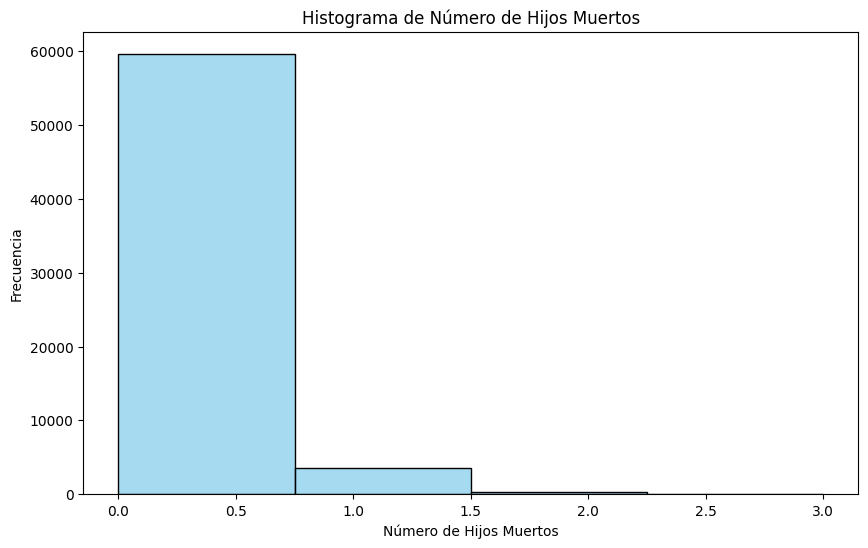

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df_renombrado['NUMERO DE HIJOS MUERTOS'], kde=False, bins=df_renombrado['NUMERO DE HIJOS MUERTOS'].max() + 1, color='skyblue')
plt.title('Histograma de Número de Hijos Muertos')
plt.xlabel('Número de Hijos Muertos')
plt.ylabel('Frecuencia')
plt.show()


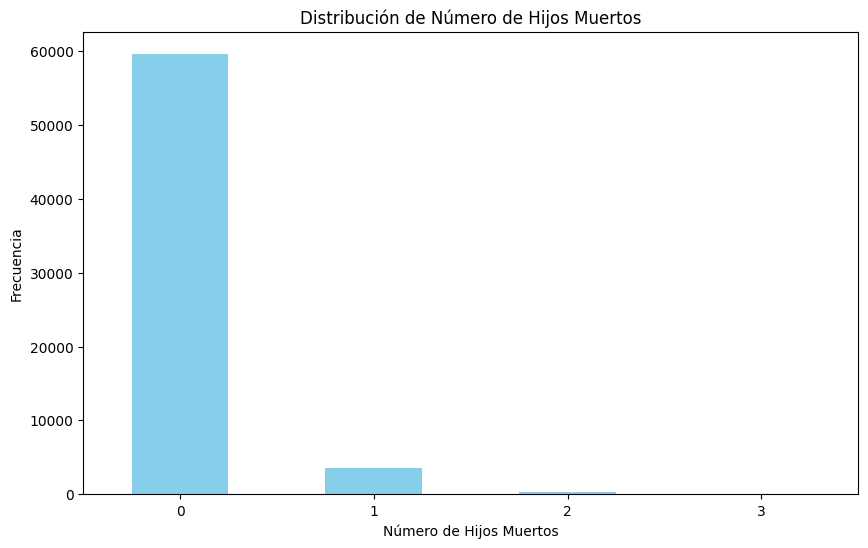

In [21]:
# Gráfico de barras del número de hijos muertos
plt.figure(figsize=(10, 6))
df_renombrado['NUMERO DE HIJOS MUERTOS'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Número de Hijos Muertos')
plt.xlabel('Número de Hijos Muertos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()


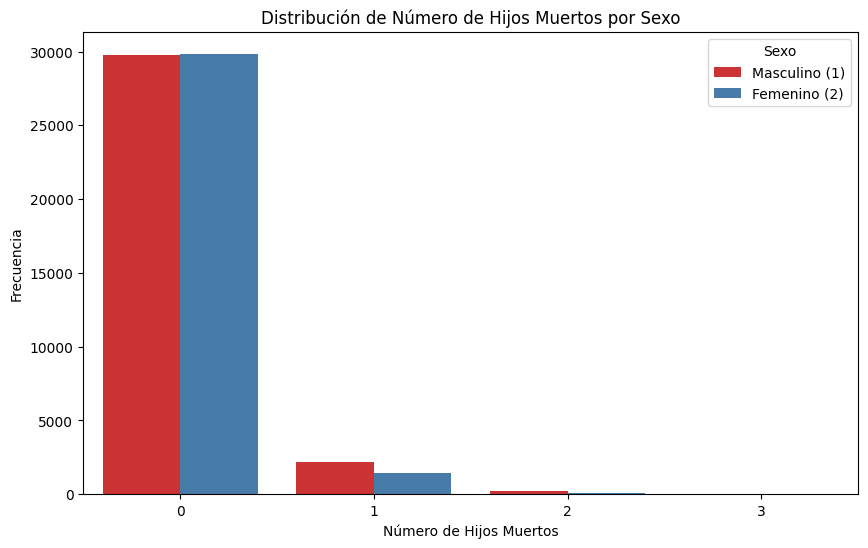

In [22]:
# Gráfico de barras de Número de Hijos Muertos por Sexo
plt.figure(figsize=(10, 6))
sns.countplot(data=df_renombrado, x='NUMERO DE HIJOS MUERTOS', hue='SEXO', palette='Set1')
plt.title('Distribución de Número de Hijos Muertos por Sexo')
plt.xlabel('Número de Hijos Muertos')
plt.ylabel('Frecuencia')
plt.legend(title='Sexo', labels=['Masculino (1)', 'Femenino (2)'])
plt.show()


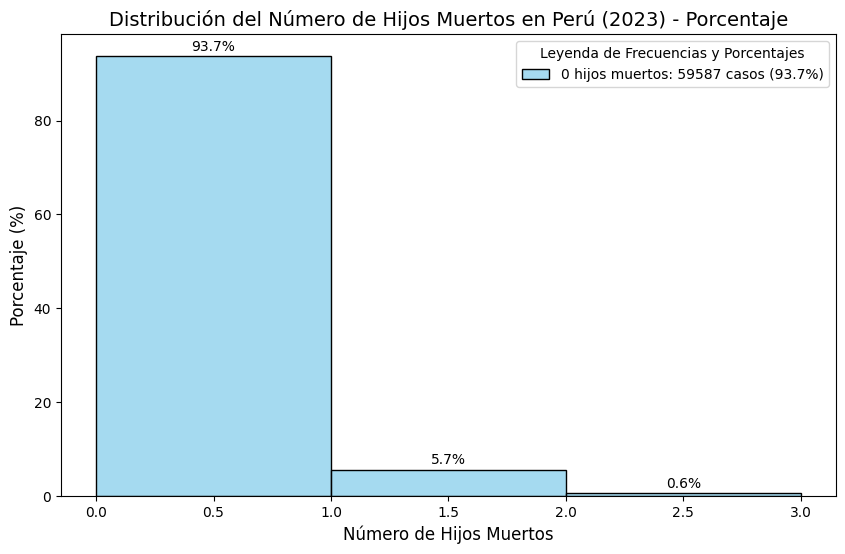

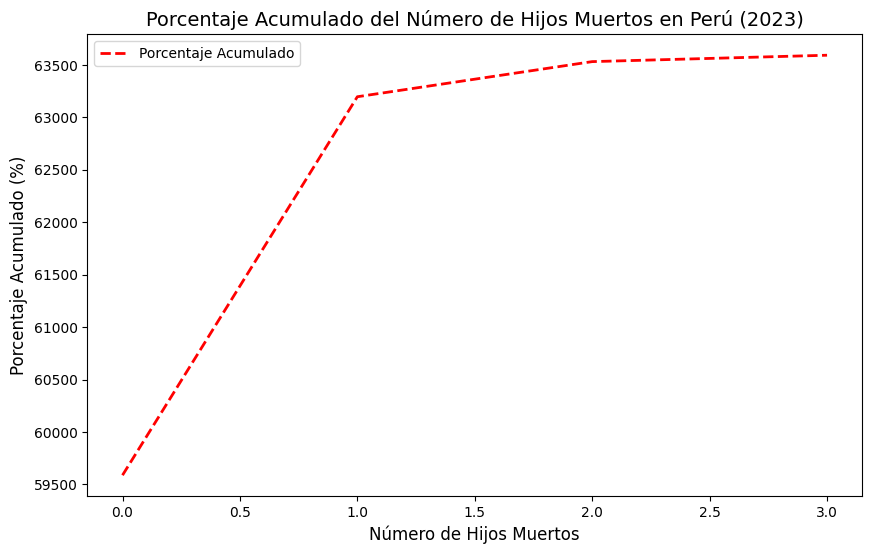

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear el gráfico para el histograma con porcentaje
plt.figure(figsize=(10, 6))

# Histograma con porcentajes
histogram = sns.histplot(df_renombrado['NUMERO DE HIJOS MUERTOS'], kde=False, stat='percent', color='skyblue', bins=np.arange(df_renombrado['NUMERO DE HIJOS MUERTOS'].min(), df_renombrado['NUMERO DE HIJOS MUERTOS'].max()+1, 1))

# Título mejorado para el histograma
plt.title('Distribución del Número de Hijos Muertos en Perú (2023) - Porcentaje', fontsize=14)
plt.xlabel('Número de Hijos Muertos', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)

# Añadir etiquetas de porcentaje a cada barra
for p in histogram.patches:
    height = p.get_height()
    # Coloca la etiqueta sobre cada barra con el porcentaje correspondiente
    plt.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Crear una leyenda que incluya las frecuencias y los porcentajes
# Calculamos las frecuencias y los porcentajes de cada valor
counts = df_renombrado['NUMERO DE HIJOS MUERTOS'].value_counts().sort_index()
percentages = counts / len(df_renombrado) * 100
legend_labels = [f'{i} hijos muertos: {int(counts[i])} casos ({percentages[i]:.1f}%)' for i in counts.index]

# Añadir leyenda al gráfico
plt.legend(legend_labels, loc='upper right', fontsize=10, title="Leyenda de Frecuencias y Porcentajes")

# Mostrar el gráfico del histograma
plt.show()

# Crear el gráfico para el porcentaje acumulado
plt.figure(figsize=(10, 6))

# Porcentaje acumulado
cumulative = df_renombrado['NUMERO DE HIJOS MUERTOS'].value_counts().sort_index().cumsum()

# Plot de porcentaje acumulado
cumulative.plot(color='red', linestyle='--', label='Porcentaje Acumulado', linewidth=2)

# Título para el gráfico acumulado
plt.title('Porcentaje Acumulado del Número de Hijos Muertos en Perú (2023)', fontsize=14)
plt.xlabel('Número de Hijos Muertos', fontsize=12)
plt.ylabel('Porcentaje Acumulado (%)', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico del porcentaje acumulado
plt.show()


In [28]:
import pandas as pd

# Contar el número total de ceros en la variable 'NUMERO DE HIJOS MUERTOS'
total_ceros = (df_renombrado['NUMERO DE HIJOS MUERTOS'] == 0).sum()

# Calcular el porcentaje de ceros en la variable 'NUMERO DE HIJOS MUERTOS'
porcentaje_ceros = total_ceros / len(df_renombrado) * 100

# Calcular estadísticas básicas de la variable 'NUMERO DE HIJOS MUERTOS'
estadisticas_basicas = df_renombrado['NUMERO DE HIJOS MUERTOS'].describe()

# Calcular la media y desviación estándar para tener una idea de la dispersión
media = df_renombrado['NUMERO DE HIJOS MUERTOS'].mean()
desviacion_estandar = df_renombrado['NUMERO DE HIJOS MUERTOS'].std()

# Imprimir las estadísticas
print(f"Estadísticas para la variable 'Número de Hijos Muertos':\n")
print(f"Total de casos con 0 hijos muertos: {total_ceros}")
print(f"Porcentaje de ceros en la variable: {porcentaje_ceros:.2f}%\n")
print("Estadísticas descriptivas básicas:")
print(estadisticas_basicas)
print(f"\nMedia: {media:.2f}")
print(f"Desviación estándar: {desviacion_estandar:.2f}")

# Ver si la cantidad de ceros es alta para sugerir exceso de ceros
if porcentaje_ceros > 20:  # Ajustar el umbral según tu criterio
    print("\nSugerencia: Hay un posible exceso de ceros en los datos, lo que podría indicar que un modelo con exceso de ceros (ZINB) podría ser adecuado para estos datos.")
else:
    print("\nSugerencia: El porcentaje de ceros no es tan alto como para justificar un modelo de exceso de ceros. Un modelo estándar de Poisson o Binomial Negativa podría ser suficiente.")


Estadísticas para la variable 'Número de Hijos Muertos':

Total de casos con 0 hijos muertos: 59587
Porcentaje de ceros en la variable: 93.70%

Estadísticas descriptivas básicas:
count    63593.000000
mean         0.070181
std          0.285566
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: NUMERO DE HIJOS MUERTOS, dtype: float64

Media: 0.07
Desviación estándar: 0.29

Sugerencia: Hay un posible exceso de ceros en los datos, lo que podría indicar que un modelo con exceso de ceros (ZINB) podría ser adecuado para estos datos.
